# ArUco Hand Tracking
- Extract and process raw trajectory data from aruco pose estimation 

In [1]:
import cv2
from cv2 import aruco 
import numpy as np 
import matplotlib.pyplot as plt 
import pickle


## File I/O Functions 
- reading and writing .pose file 

In [2]:
def load_calib(): 
    """Load camera calibration variables from disk"""
    with open('/home/ausaf/Documents/aruco_hand/calib.pickle','rb') as f: 
        data = pickle.load(f)

    ret,camera_matrix,dist,rvecs,tvecs=data
    
    return  ret,camera_matrix,dist,rvecs,tvecs

In [7]:
def load_pose(fname): 
    """Load a *.pose trajectory list from disk"""
    with open(f'/home/ausaf/Documents/aruco_hand/{fname}', 'rb') as f: 
        data = pickle.load(f)
    return data
    

In [5]:
def get_centers(corners):
    """Take a standard corners list and return a corresponding list of the
    center points"""
#     centers = []
    X = []
    Y = []
    for i in range(len(corners)):
        x = corners[i][0][:,0].mean()
        y = corners[i][0][:,1].mean()
        X.append(x)
        Y.append(y)
#         centers.append((x,y))
    return X,Y  

In [ ]:
def get_trajectory(data,img=None):
    trajectory = []
    for snapshot in data: 
        if snapshot is False: 
            trajectory.append(False)
            continue
        corners, ids, rotations, translations = snapshot
        pts = {} 
        for (i,c,r,t) in zip(ids,corners,rotations,translations):
            x,y = c[0][:,0].mean(),c[0][:,1].mean()
#             if i[0]==1:
#                 plt.scatter(x,y)
            pts[i[0]] = x,y
            if img is not None: 
                cv2.circle(img, (x,y), 3, (255,0,0), 3)
        trajectory.append(pts)
        
    return trajectory

In [109]:
def split_trajectory(traj, i=[4,5]):
    ts = {}
    for j in i: 
        ts[j] = []
    
    for pts in traj: 
        if pts is False: 
            for j in i: 
                ts[j].append(False)
            continue
        for j in i: 
            ts[j].append(pts[j] if j in pts.keys() else False)
    
    return ts

In [ ]:
def gaps(arr):
    g = []
    current = None
    end = None
    for i in range(1,arr): 
        if arr[i] is False and arr[i-1] is not False: 
            current = i 
        elif arr[i] is not False and arr[i-1] is False: 
            

In [118]:
norm = load_pose('pose/norm.pose')
bad = load_pose('pose/bad.pose')
worst = load_pose('pose/worst.pose')

data = [norm,bad,worst]
hand = []
wrist = []
for d in data: 
    t = get_trajectory(d)
    s = split_trajectory(t)
    hand.append(s[4])
    wrist.append(s[5])

In [155]:
hand[0][:] = [x for x in hand[0] if x != False]
hand[1][:] = [x for x in hand[1] if x != False]
hand[2][:] = [x for x in hand[2] if x != False]

wrist[0][:] = [x for x in wrist[0] if x != False]
wrist[1][:] = [x for x in wrist[1] if x != False]
wrist[2][:] = [x for x in wrist[2] if x != False]

k = [hand,wrist]

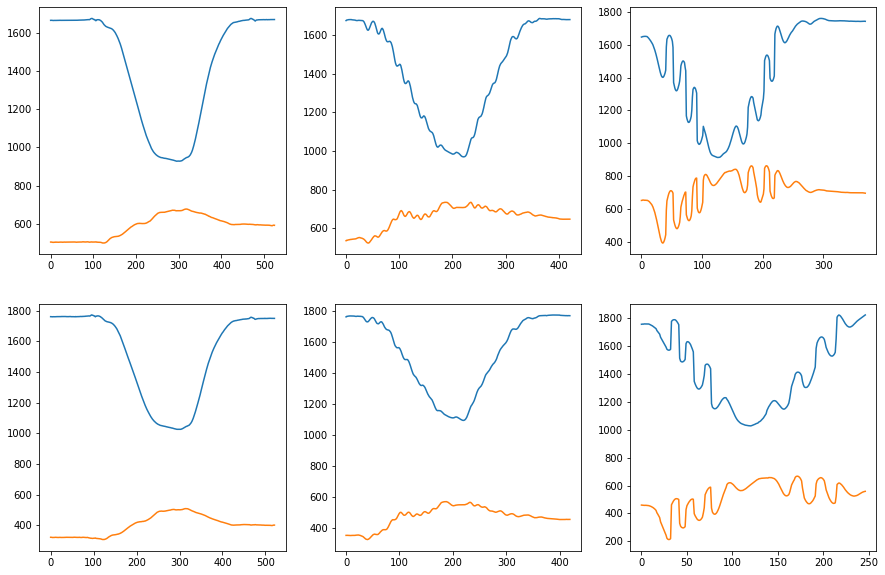

In [157]:
fig, axs = plt.subplots(2,3)
fig.set_size_inches(15,10)
for i in range(2): 
    for j in range(3): 
        axs[i,j].plot(k[i][j])